## CDades Sprint 7. Algoritmes d'aprenentatge supervisat, Classificació.

### Carga, análisis y preparación del dataset.

In [1]:
# importamos las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importamos los datos
df_wine = pd.read_csv("C:\IT Academy\Sprint 7 Algoritmos de Aprendizaje Supervisado Clasificación\wineData.txt", header=None)

In [3]:
df_wine.shape

(178, 14)

In [4]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Descripción de los atributos. 
Nuestro dataset recoge los resultados del análisis químico de un conjunto de vinos elaborados en una región de Italia, procedentes de tres cultivares diferentes. Los análisis determinan trece componentes encontrados en cada uno de los vinos.  

0) Cultivar  
1) Alcohol  
2) Ácido Málico  
3) Ceniza  
4) Alcalinidad Ceniza  
5) Magnesio  
6) Total Fenoles  
7) Flavonoides  
8) Fenoles no Flavonoides  
9) Proantocianinas  
10) Intensidad de Color  
11) Tono  
12) OD280/OD315 de vinos diluidos  
13) Prolina

In [5]:
# renombramos las columnas
df_wine.columns=['Cultivar','Alcohol','Ácido Málico','Ceniza','Alcalinidad Ceniza','Magnesio','Total Fenoles','Flavonoides','Fenoles no Flavonoides','Proantocianinas','Intensidad de Color','Tono','Dilución','Prolina']

In [6]:
df_wine.head()

,Cultivar,Alcohol,Ácido Málico,Ceniza,Alcalinidad Ceniza,Magnesio,Total Fenoles,Flavonoides,Fenoles no Flavonoides,Proantocianinas,Intensidad de Color,Tono,Dilución,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df_wine.dtypes

Cultivar                    int64
Alcohol                   float64
Ácido Málico              float64
Ceniza                    float64
Alcalinidad Ceniza        float64
Magnesio                    int64
Total Fenoles             float64
Flavonoides               float64
Fenoles no Flavonoides    float64
Proantocianinas           float64
Intensidad de Color       float64
Tono                      float64
Dilución                  float64
Prolina                     int64
dtype: object

Todas nuestras variables son numéricas continuas salvo Cultivar que es numérica ordinal.

In [8]:
df_wine.isna().sum()

Cultivar                  0
Alcohol                   0
Ácido Málico              0
Ceniza                    0
Alcalinidad Ceniza        0
Magnesio                  0
Total Fenoles             0
Flavonoides               0
Fenoles no Flavonoides    0
Proantocianinas           0
Intensidad de Color       0
Tono                      0
Dilución                  0
Prolina                   0
dtype: int64

In [9]:
df_wine.isnull().sum()

Cultivar                  0
Alcohol                   0
Ácido Málico              0
Ceniza                    0
Alcalinidad Ceniza        0
Magnesio                  0
Total Fenoles             0
Flavonoides               0
Fenoles no Flavonoides    0
Proantocianinas           0
Intensidad de Color       0
Tono                      0
Dilución                  0
Prolina                   0
dtype: int64

Nuestro dataset no contiene registros vacíos ni valores nulos.

In [10]:
df_wine.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Cultivar,178.0,1.94,0.78,1.00,1.00,2.00,3.00,3.00
Alcohol,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
Ácido Málico,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
Ceniza,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
Alcalinidad Ceniza,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
Magnesio,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
Total Fenoles,178.0,2.30,0.63,0.98,1.74,2.36,2.80,3.88
Flavonoides,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
Fenoles no Flavonoides,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
Proantocianinas,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58


Observamos algunas desviaciones estandard altas que indican distribuciones asimétricas.

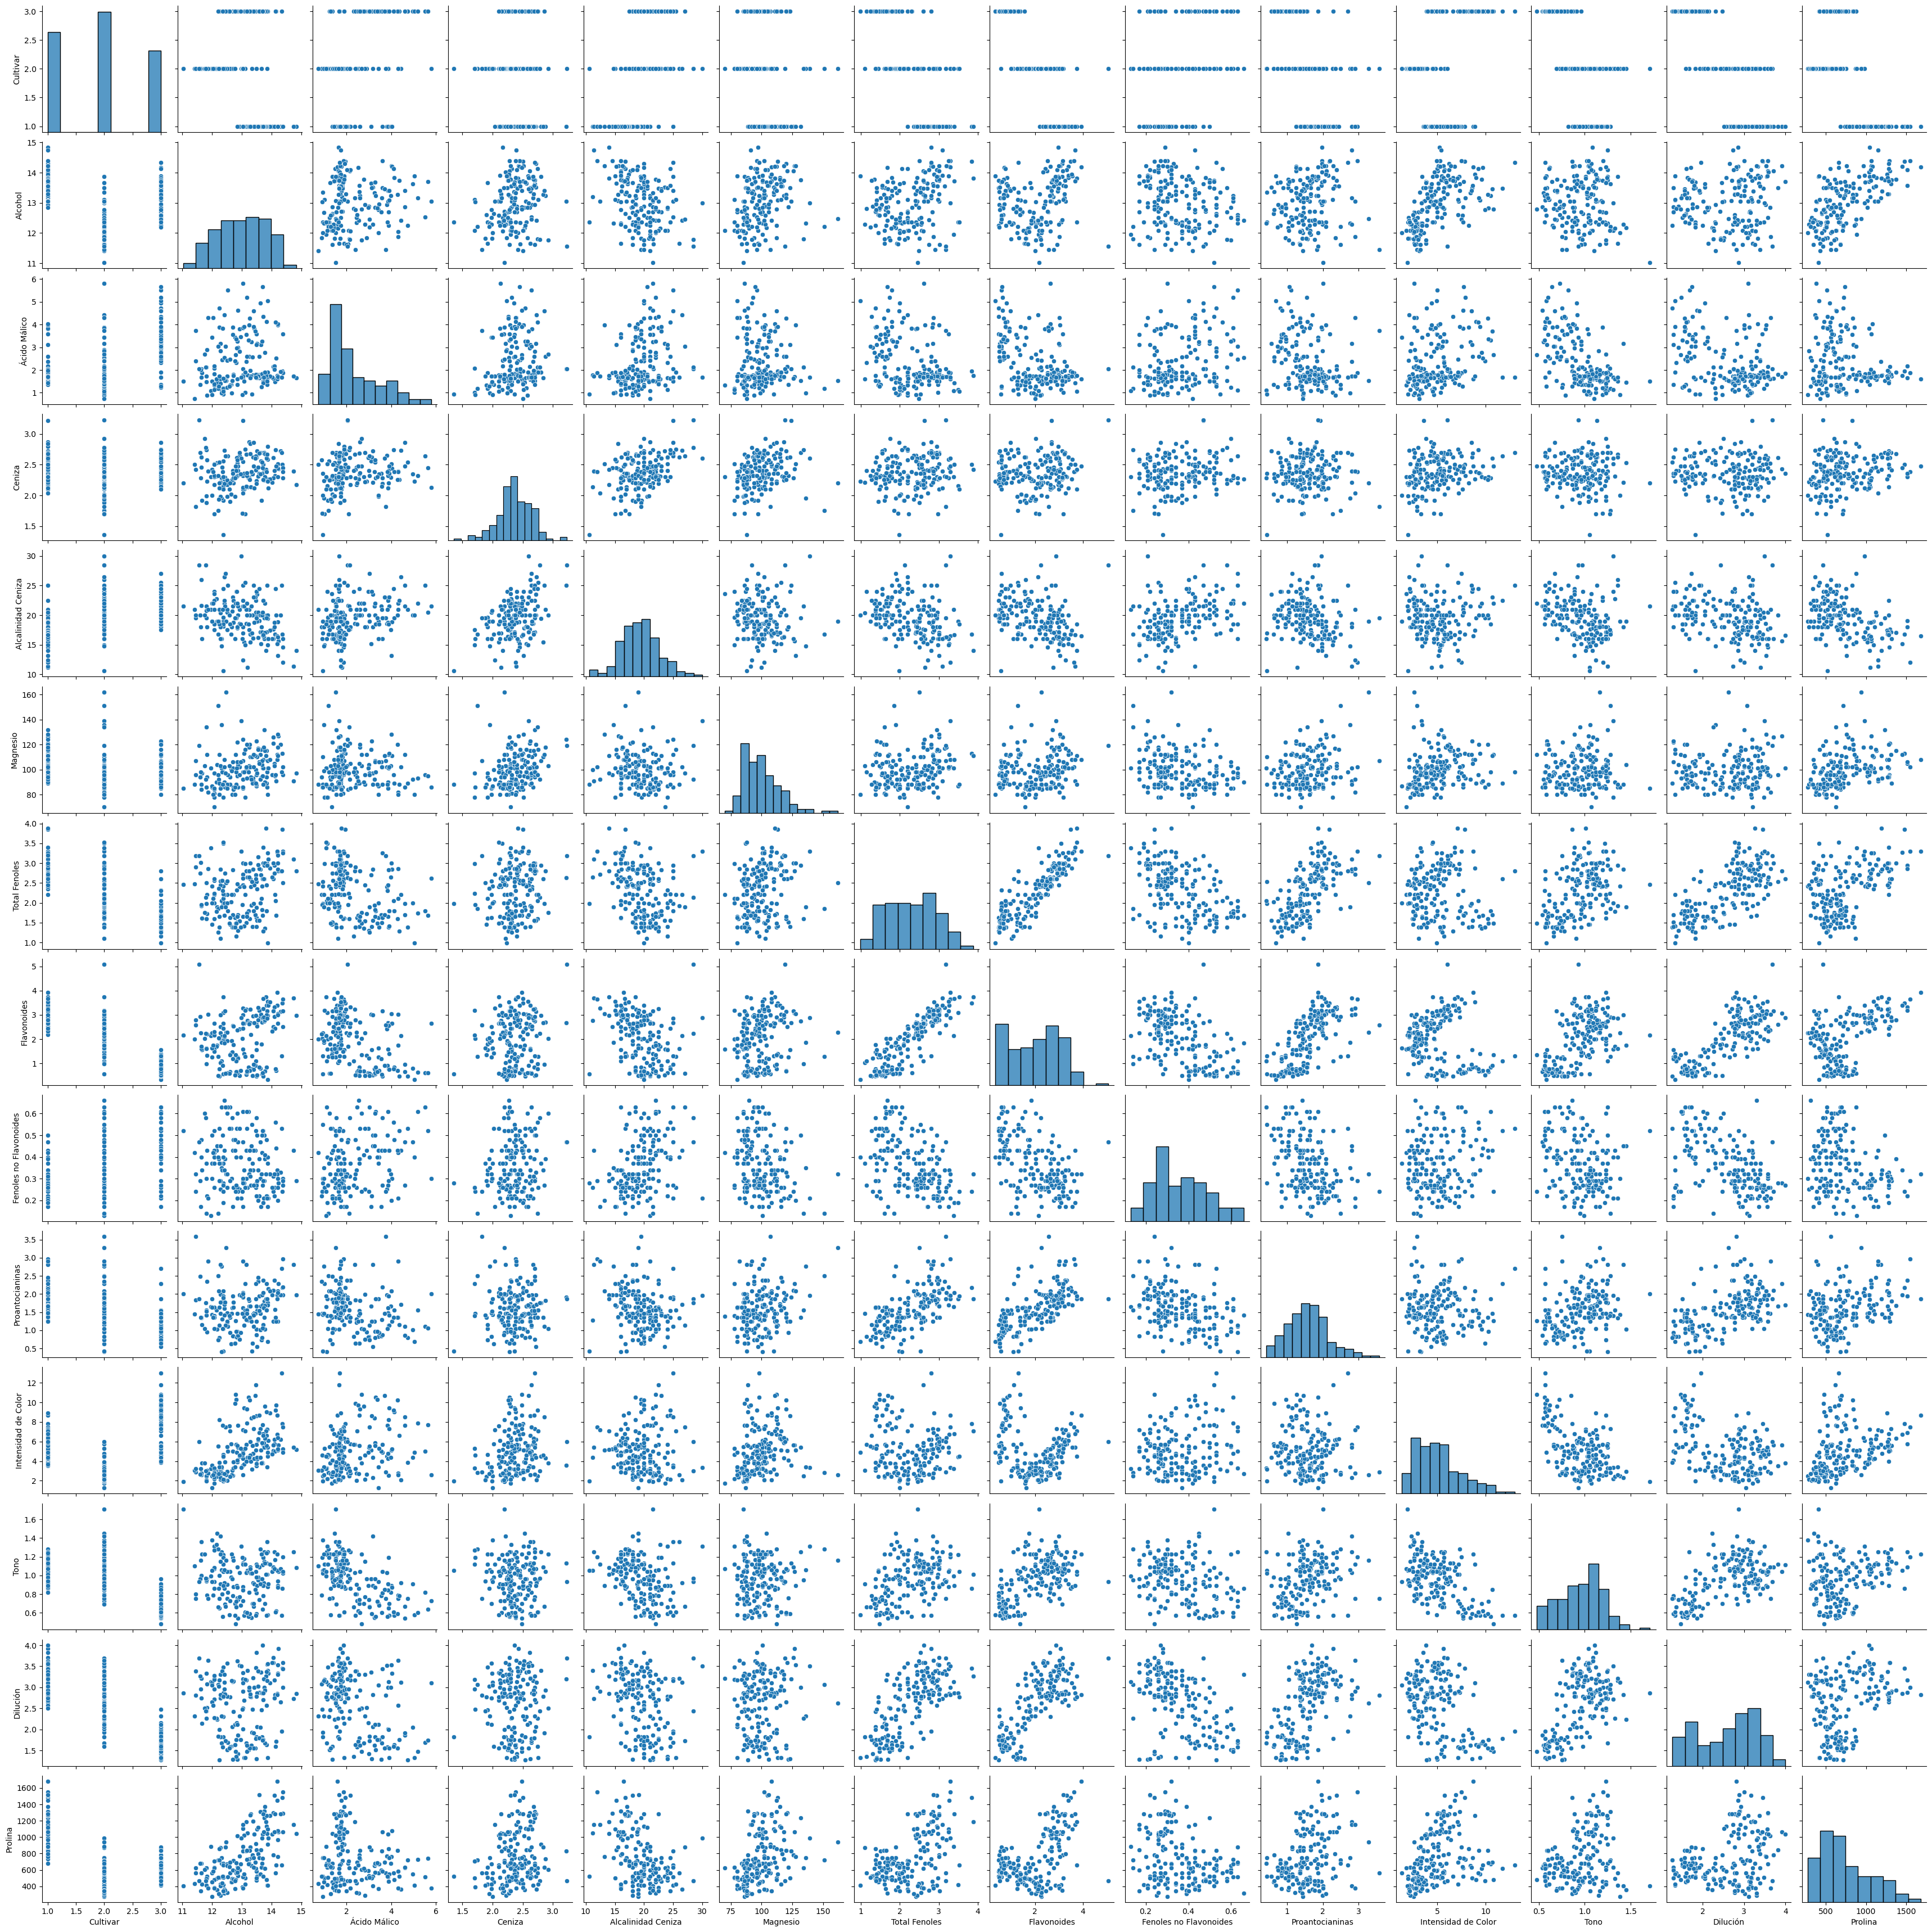

In [11]:
sns.pairplot(df_wine);

Observamos que la variable categórica ordinal tiene tres valores, que nos encontraremos algunos outliers y que las distribuciones parecen no gaussianas.

### Definimos la variable objetivo.  
Nuestra variable objetivo es el tipo de cultivar. Queremos predecir con nuestro modelos a qué tipo de cultivar pertenece cada vino en función de sus caracteríaticas quimicas obtenidas en los análisis y que se han recogido en nuestro dataset.

In [12]:
y = df_wine['Cultivar'].copy()
y.shape

(178,)

In [13]:
y.nunique()

3

In [14]:
df_wine['Cultivar'].value_counts()

2    71
1    59
3    48
Name: Cultivar, dtype: int64

#### Nuestra variable objetivo es numérica discreta multinomial. Esto decide que nuestros modelos deben ser de clasificación multinomiales.  
#### También apreciamos que tiene tres valores y que el número de registros pertenecientes a cada uno es diferente, está desbalanceada.

### Definimos el subdataset de nuestras variables independientes.

In [15]:
X = df_wine.drop('Cultivar', axis=1).copy()
X.shape

(178, 13)

### Exercici 1
#### Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

#### División del Dataset en Train y Test.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0, shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(124, 13) (54, 13) (124,) (54,)


### Construcción de los modelos.  
Vamos a trabajar con algoritmos de clasificación multinomial. estos algoritmos dividen el dataset en varios dataset para reducir la clasificación a varias clasificaciones binarias. Pueden hacer estas clasificaciones con el método One-vs-Rest, un subdataset y agrupar los demás, o el método One-vs-One, hacer la clasificación binaria un subdataset con otro hasta cruzarlos todos.

### Modelo Decision Tree Classifier.  
Este modelo de clasificación es fálcil de interpretar y visualizar y captura fácilmente patrones no lineares.  
No necesita preprocesado ni normalización de variables por su naturaleza no paramétrica. Se afecta de un dataset con datos redundantes.  
Puede ser usado para preprocesado o predicción de valores NaN. 

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0)
dt_classifier.fit(X_train, y_train)
dt_classifier.score(X_test, y_test)

0.9444444444444444

In [18]:
y_pred_DT = dt_classifier.predict(X_test)

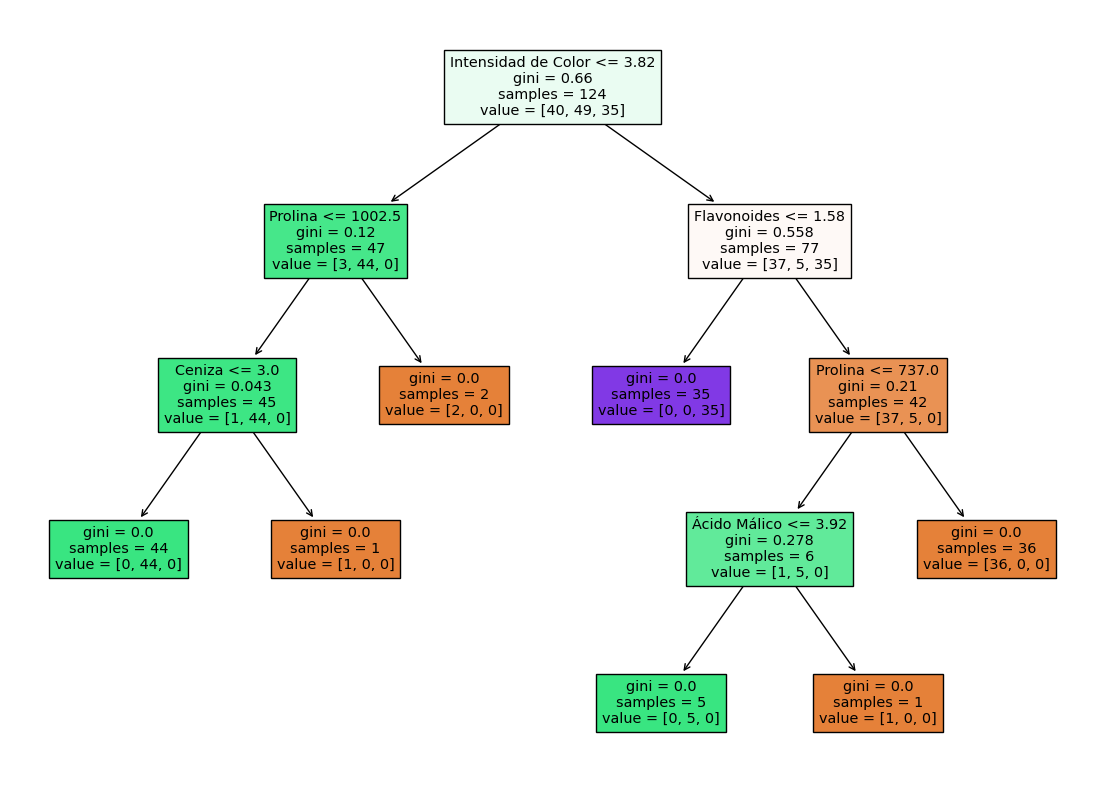

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,10))
plot_tree(decision_tree = dt_classifier, feature_names = X.columns, filled = True);

Vemos cómo funciona el árbol, tomamos una muestra:

In [20]:
muestra = X.loc[157]
muestra

Alcohol                    12.45
Ácido Málico                3.03
Ceniza                      2.64
Alcalinidad Ceniza         27.00
Magnesio                   97.00
Total Fenoles               1.90
Flavonoides                 0.58
Fenoles no Flavonoides      0.63
Proantocianinas             1.14
Intensidad de Color         7.50
Tono                        0.67
Dilución                    1.73
Prolina                   880.00
Name: 157, dtype: float64

El nodo raíz o primera decisión es Intensidad de color, tenemos el valor 7,5, que es mayor que el corte <=3,82, por tanto vamos a la rama derecha. Segundo nodo, Flavoniodes, tiene un valor de 0,63 que es menor que el corte <=1,58, vamos a la rama izquierda que ya nos da la solución value = [0,0,35], pertenece al Cultivar 3, que contiene 35 vinos. Estamos en una hoja o nodo final, no hay más ramas porque todos los elementos pertenecen a las misma etiqueta o grupo. 
Vamos a comprobar si la predicción de Cultivar 3 es correcta:

In [21]:
print(y[157])

3


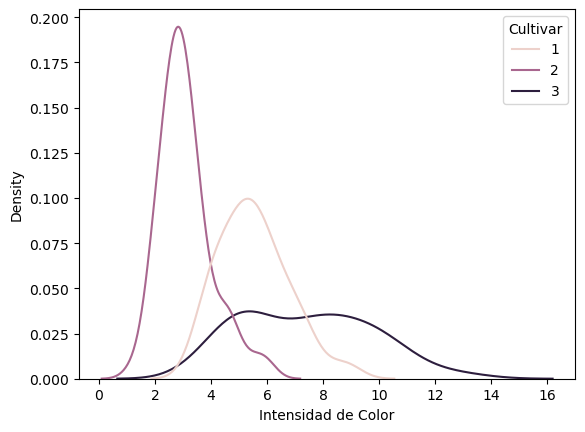

In [22]:
sns.kdeplot(x=df_wine['Intensidad de Color'], hue=df_wine['Cultivar']);

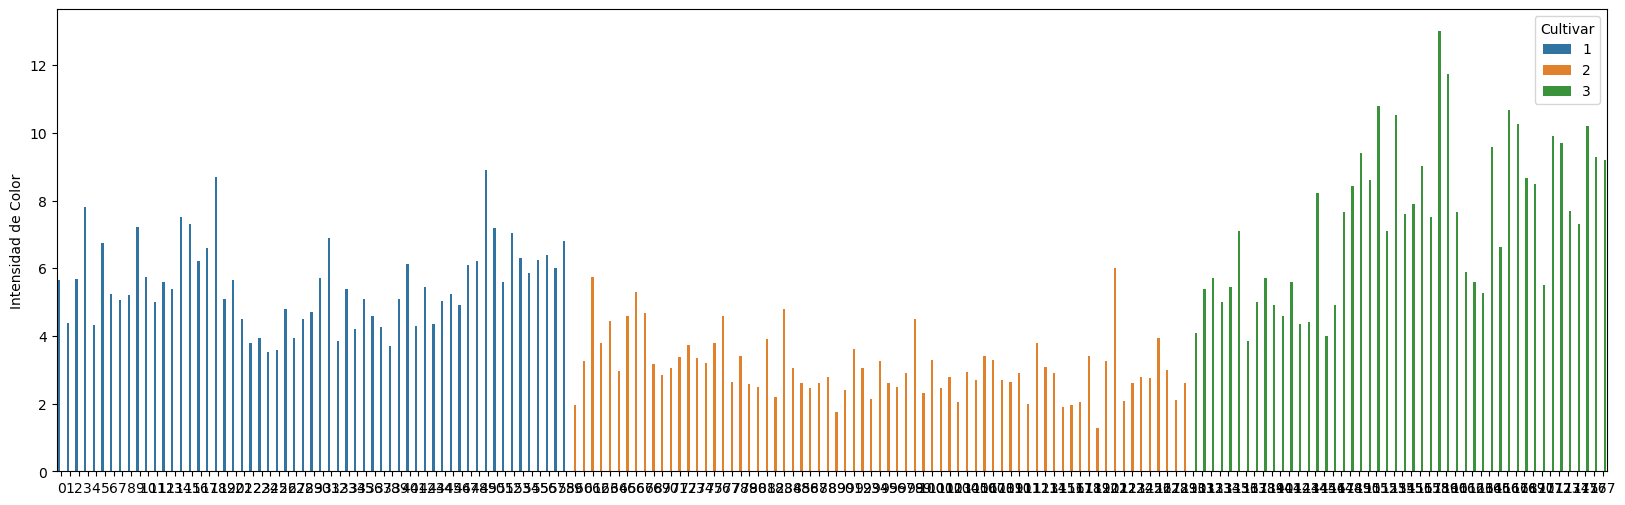

In [23]:
plt.figure(figsize=(20,6))
sns.barplot(x=df_wine.index, y = df_wine['Intensidad de Color'], hue=df_wine['Cultivar']);

Vemos que hay una gran diferencia en la Intensidad de Color entre cultivares, por eso el modelo la ha elegido como variable raíz, como primera clasificación de partida.

### Modelo Nearest Neighbor Classifier.  
Método de clasificación supervisado que  busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean.  
Es un método basado en la Instacia, no memoriza un modelo si no que se basa en el entrenamiento. Al entrenar cada punto necesita mucha memoria, por esta razón KNN tiende a funcionar mejor en datasets pequeños y sin una cantidad enorme de variables. No funciona bien con variables categóricas.  
Es sencillo de implementar, no necesita un entrenamiento previo y sólo necesita dos parámetros para funcionar, el número de vecinos y la función de la distancia.  
Se puede usar para regresión, clasificación y detección de outliers. No necesita preprocesado, es un algoritmo no paramétrico.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)
knn_classifier.score(X_test, y_test)

0.7222222222222222

In [25]:
y_pred_KNN = knn_classifier.predict(X_test)

### Modelo Support Vector Machine.  
Modelo de clasificación binaria que no soporta clasificación multiclase de manera nativa, requiere un estrategia OVR o OvO, explicadas anteriormente.  
Ofrece una buena precisión y rapidez y ocupa poca memoria porque trabaja con subsets. Trabaja bien con un margen claro de separación y alto espacio dimensional. No es apropiado para grandes datasets.  
Es sensible al Kernel usado que puede ser lineal, polinómico, RBF (radial basis function) y más.

In [26]:
from sklearn.svm import SVC

svm_classifier = SVC(random_state=0)

svm_classifier.fit(X_train, y_train)
svm_classifier.score(X_test, y_test)

0.7777777777777778

In [27]:
y_pred_SVM = svm_classifier.predict(X_test)

### Exercici 2.
#### Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.


#### Accuracy.  
Describe cuántas predicciones de nuestro modelo han sido correctas. La predicción más baja es 0 y la más alta 1.

In [28]:
from sklearn import metrics

prediccions = [y_pred_DT,y_pred_KNN,y_pred_SVM]
accuracy_model = []

for y_pred in prediccions:
    accuracy=metrics.accuracy_score(y_test, y_pred,)
    accuracy_model.append(accuracy)

In [29]:
df_accuracy = pd.DataFrame((accuracy_model), columns=['Accuracy'], index = ['Modelo Dec Tree','Modelo KNN','Modelo SVM'])
df_accuracy.head()

,Accuracy
Modelo Dec Tree,0.944444
Modelo KNN,0.722222
Modelo SVM,0.777778


#### La métrica Accuracy es insuficiente cuando trabajas con una variable objetivo multinomial y un dataset desbalanceado, podemos tener un Accuracy alto en algunas clases y bajo en otras clases en las que el modelo esté fallando. Necesitaremos otras métricas para estudiar mejor el rendimiento de los modelos.

#### Matriz de confusión.
Matriz cuadrada que permite inspeccionar y evaluar visualmente las predicciones de nuestro modelo. En cada fila se representa el número de predicciones de cada clase y en las columnas las instancias de la clase real:

   - Verdadero positivo (VP): número de ejemplos positivos que el modelo predice como positivos.

   - Falso positivo (FP): número de ejemplos negativos que el modelo predice como positivos.

   - Falso negativo (FN): número de ejemplos positivos que el modelo predice como negativos.

   - Verdadero negativo (VN): número de ejemplos negativos que el modelo predice como negativos.

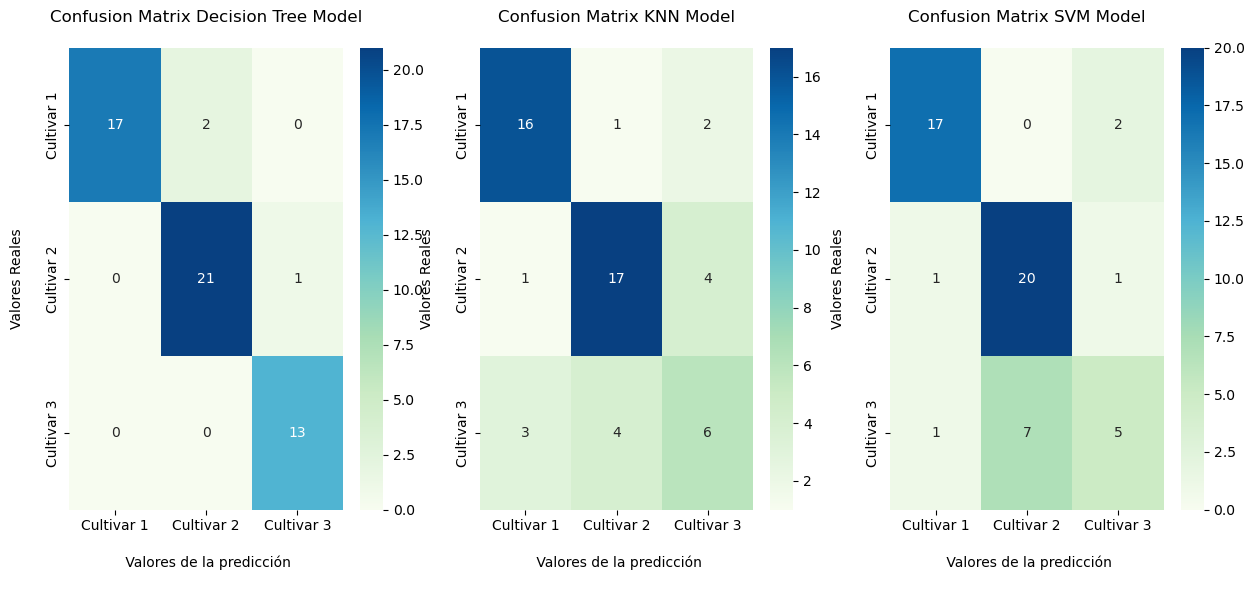

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# nombramos las clases de nuestra variable objetivo para la matrix
cultivares = ['Cultivar 1','Cultivar 2','Cultivar 3']

plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_DT), columns=cultivares, index = cultivares)
fx = sns.heatmap(cm, annot=True, fmt='d',cmap="GnBu")
fx.set_title('Confusion Matrix Decision Tree Model\n')
fx.set_xlabel('\n Valores de la predicción\n')
fx.set_ylabel('Valores Reales\n')
print('');

plt.subplot(1,3,2)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_KNN), columns=cultivares, index = cultivares)
fx = sns.heatmap(cm, annot=True, fmt='d',cmap="GnBu")
fx.set_title('Confusion Matrix KNN Model\n')
fx.set_xlabel('\n Valores de la predicción\n')
fx.set_ylabel('Valores Reales\n')
print('');

plt.subplot(1,3,3)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_SVM), columns=cultivares, index = cultivares)
fx = sns.heatmap(cm, annot=True, fmt='d',cmap="GnBu")
fx.set_title('Confusion Matrix SVM Model\n')
fx.set_xlabel('\n Valores de la predicción\n')
fx.set_ylabel('Valores Reales\n')
print('');

#### Observamos que el modelo con más Verdaderos positivos en la diagonal en el Decision Tree, con el valor accuracy más alto.  
#### También vemos que las clases Cultivar 1 y Cultivar 2 tienen en todos los modelos Verdaderos Positivos altos, es la clase Cultivar 3 la que en los modelos KNN y SVM tienenmuy pocos Verdaderos positivos, es la clase que hace que tengan estos modelos un accuracy tan bajo.

#### Otras métricas.  
Evaluaremos los modelos con otras métricas que nos indican cómo de bien trabajan cuando necesitamos en la clasificación una precisón concreta, como sensibilidad en un test o que un paciente enfermo no se clasifique como sano: 
- Precision: proporción de elementos clasificados como positivos correctamente entre todos los elementos clasificados como positivos.  Layman definition: Of all the positive predictions I made, how many of them are truly positive?
- Recall o sensibilidad: proporción de elementos clasificados como positivos correctamente entre todos los elementos positivos reales.  Layman definition: Of all the actual positive examples out there, how many of them did I correctly predict to be positive?  
- F1 score: combina las métricas Precision y Recall para dar un único resultado. Esta métrica es la más apropiada cuando tenemos conjuntos de datos no balanceados. Se calcula como la media armónica de Precision y Recall, la media armónica hace que si una de las dos medidas es pequeña (aunque la otra sea máxima), el valor de F1 score va a ser pequeño.  
  Para una clasificación multiclase calculamos el F1 de cada clase con el método One-vs-Rest (OvR) en lugar de una media como en la clasificación binaria. Esta "media" en el problema multiclase necesita un parámetro:
     - Macro Average: media aritmética de cada clase, trata a todas las clases por igual independientemente del número de registros que tenga cada clase, no apropiado para clases desbalanceadas,
     - Micro Average: suma los TP, FN y FP de todas las clase y después calcula F1_micro. Si las clases no están excesivamente desbalanceadas tendrá un valor similar a Macro Average,
     - Weighted Average: toma la media de cada clase teniendo en cuenta la proporción del número de registros.

In [31]:
precision_model = []
recall_model = []
f1_model = []

for y_pred in prediccions:
    precision=metrics.precision_score(y_test, y_pred, average='weighted')
    precision_model.append(precision)
    recall=metrics.recall_score(y_test, y_pred, average='weighted')
    recall_model.append(recall)
    f1=metrics.f1_score(y_test, y_pred, average='weighted')
    f1_model.append(f1)
    
df_accuracy['Precision'] = precision_model
df_accuracy['Recall'] = recall_model
df_accuracy['F1'] = f1_model

df_accuracy

,Accuracy,Precision,Recall,F1
Modelo Dec Tree,0.944444,0.947378,0.944444,0.944376
Modelo KNN,0.722222,0.716667,0.722222,0.719069
Modelo SVM,0.777778,0.767061,0.777778,0.762031


In [32]:
print('Modelo Decision Tree')
print(metrics.classification_report(y_test, y_pred_DT))
print('')

print('Modelo KNN')
print(metrics.classification_report(y_test, y_pred_KNN))
print('')

print('Modelo SVM')
print(metrics.classification_report(y_test, y_pred_SVM))
print('')

Modelo Decision Tree
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       0.91      0.95      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54


Modelo KNN
              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.77      0.77      0.77        22
           3       0.50      0.46      0.48        13

    accuracy                           0.72        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.72      0.72      0.72        54


Modelo SVM
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.74      0.91      0.82        22
           3       0.62      0

En las métricas por clase observamos que Decision Tree tienen valores muy altos en todas las métricas, por clase y en las medias. Sin embargo, los otros dos modelos tienen las medias más bajas y observamos que es por los resultados de la clase Cultivar 3.

### Exercici 3
#### Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

#### Para nuestro ejercicio recuriremos a la función RepeatedStratifiedKFold con 5 subsets (n_splits = 5) y una valodación cruzada de 3 repeticiones (n_repeats = 3). Esta función asegura que la proporción de las tres clases de nuestra variable objetivo es la misma en los sets Train-Test que en el dataset completo.

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

### Modelo Decision Tree Classifier con GridSearch.
Los parámetros que vamos a optimizar serán los siguientes:
 - criterion: es opcional, por defecto 'gini' para el índice Gini. También puede tener el valor 'entropy' (grado de impureza cuando se agrupan varios elementos de clases diferentes, toma valor 0 cuando todos los elementos pertenecen a la misma clase) para calcular 'information gain' la diferencia entre la entropía del dataset antes de dividirlo y después. 
 - splitter: es una cadena, es opcional, nos permite elegir la estategia para decidir cómo son las divisiones del Dataset. Por defecto 'best' si no también puede tomar el valor 'random'.  
 - max_depth: es un entero o None, es opcional. None por defeto o Maximum Depth de un árbol, profundidad máxima. Si toma el valor None los nodos se expanden hasta las hojas con menos muestras que 'min_samples_split'. Un valor máximo deriva en overfitting o sobre entrenamiento, un valor bajo deriva en underfitting o falta de entrenamiento.

In [34]:
dt_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [35]:
model_DT = DecisionTreeClassifier(random_state = 0)
params_DT = {'criterion': ['entropy','gini'], 'max_depth': [3,5,7], 'splitter' : ['best','random']}

GS_DT = GridSearchCV(estimator=model_DT, 
                      param_grid=params_DT, 
                      cv=cv_method,
                      verbose=1, 
                      scoring='accuracy',
                      return_train_score=True)

GS_DT.fit(X_train, y_train)
GS_DT.score(X_test, y_test)

Fitting 15 folds for each of 12 candidates, totalling 180 fits


0.9629629629629629

In [36]:
GS_DT.best_params_

{'criterion': 'gini', 'max_depth': 7, 'splitter': 'random'}

In [37]:
GS_DT.best_score_

0.9164444444444445

#### Entrenamos el modelo con los parámetros que hemos obtenido.

In [38]:
model_DT_BP = DecisionTreeClassifier(criterion='gini',max_depth=7, splitter = 'random', random_state = 0)

model_DT_BP.fit(X_train, y_train)
model_DT_BP.score(X_test, y_test)

0.9629629629629629

In [39]:
y_pred_DT_BP = model_DT_BP.predict(X_test)

### Modelo Nearest Neighbor Classifier con GridSearch.

Los parámetros que estudiaremos con Grid Search son:  
   - metric: La distancia entre puntos puede ser medida de con diferentes estrategias como Minkowski, Euclidean, Manhattan, Mahalanobis or Hamming formula y otras. En grandes datasets la distancia Euclidean falla y se usa Manhattan,  
   - n_neighbors: número de vecinos a tener en cuenta, hacemos que sea impar para facilitar la clasificación,  
   - weights: por defecto 'uniform', todos los puntos tienen el mismo peso o importancia, también toma el valor 'distance', valora los puntos por el inverso de su distancia.    

In [40]:
knn_classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [41]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

model_KNN = KNeighborsClassifier()

params_KNN = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)

GS_KNN_BP = GridSearchCV(estimator=model_KNN, 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=1, 
                      scoring='accuracy',
                      return_train_score=True)

GS_KNN_BP.fit(X_train, y_train)
GS_KNN_BP.best_score_

Fitting 15 folds for each of 60 candidates, totalling 900 fits


0.8008888888888889

In [42]:
GS_KNN_BP.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

#### Entrenamos el modelo con los parámetros que hemos obtenido.

In [43]:
model_KNN_BP = KNeighborsClassifier(metric = 'manhattan', p=1, n_neighbors = 1, weights = 'uniform')

model_KNN_BP.fit(X_train, y_train)
model_KNN_BP.score(X_test, y_test)

0.8333333333333334

In [44]:
y_pred_KNN_BP = model_KNN_BP.predict(X_test)

### Modelo Support Vector Machine con GridSearch.  
El modelo Support Vector Machines fue diseñado para clasificación binaria, no predice de forma nativa variables objetivo con más de dos clases.
Vamos a estudiar los siguientes parámetros para este modelo:  
   - kernel: sus funciones son usadas para mapear el daset original a un espacio dimensionalmente más alto. Puede tomar valores 'linear', 'polynomial', 'RBF'. Los kernel linear y poly son los que menos tiempo emplean y son menos precisos que RBF (radial basis function) o Gaussianos. Polynomial y RBF son útiles para hyperplanos o lineales, computam la línea de separación en la dimensión más alta,  
   - Regularization: el parámetro de la regularización es 'C', indica mala clasificación. Un valor bajo de C crea un hiperplano con poco margen y al revés.  
   - Gamma: un bajo valor de este parámetro hace que al dataset le falte entrenamiento, un valor alto es da lugar a in  overfitting.

In [45]:
svm_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [46]:
model_SVM = SVC()

params_SVM = {'kernel':['linear', 'poly','rbf'], 'C':[50, 10, 1.0, 0.1, 0.01], 'gamma' : ['scale','auto']}

GS_SVM_BP = GridSearchCV(estimator=model_SVM, 
                      param_grid=params_SVM, 
                      cv=cv_method,
                      verbose=1, 
                      scoring='accuracy',
                      return_train_score=True)

GS_SVM_BP.fit(X_train, y_train)
GS_SVM_BP.score(X_test, y_test)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


0.9629629629629629

In [47]:
GS_SVM_BP.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

#### Entrenamos el modelo con los parámetros que hemos obtenido.

In [48]:
model_SVM_BP = SVC(C = 0.1, kernel = 'linear', gamma = 'scale')

model_SVM_BP.fit(X_train, y_train)
model_SVM_BP.score(X_test, y_test)

0.9629629629629629

In [49]:
y_pred_SVM_BP = model_SVM_BP.predict(X_test)

#### Calculamos F1_weighted para todos los modelos.

In [50]:
y_pred_BP = [y_pred_DT_BP, y_pred_KNN_BP, y_pred_SVM_BP]
f1_model_BP = []
accuracy_model_BP = []

for y_pred in prediccions:
    f1=metrics.f1_score(y_test, y_pred, average='weighted')
    f1_model_BP.append(f1)
    accuracy=metrics.accuracy_score(y_test, y_pred)
    accuracy_model_BP.append(accuracy)

In [51]:
df_accuracy['Accuracy_BP'] = accuracy_model_BP
df_accuracy['F1_BP'] = f1_model_BP

In [52]:
df_accuracy

,Accuracy,Precision,Recall,F1,Accuracy_BP,F1_BP
Modelo Dec Tree,0.944444,0.947378,0.944444,0.944376,0.944444,0.944376
Modelo KNN,0.722222,0.716667,0.722222,0.719069,0.722222,0.719069
Modelo SVM,0.777778,0.767061,0.777778,0.762031,0.777778,0.762031


#### Aplicar los mejores hiperparámetros no ha supuesto una mejora en los modelos, ya tenían los hiperparámetros ajustados por defecto.

### Exercici 4
#### Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

Para hacer la validación cruzada usaremos los modelos entrenados con los mejores parámetros, así nos aseguramos de que si tienen mayor precisón es por la validación cruzada.

In [53]:
from sklearn.model_selection import cross_val_score

modelos = [model_DT_BP,model_KNN_BP,model_SVM_BP]
cv_f1_weighted = []

for modelo in modelos:
    cv_scores = cross_val_score(
                    estimator = modelo,  
                    X         = X_train,
                    y         = y_train,
                    scoring   = 'f1_weighted',
                    cv        = cv_method  # usamos el mismo RepeatedStratifiedKFold de antes
                                 )
    cv_f1_weighted_mean = cv_scores.mean()
    cv_f1_weighted.append(cv_f1_weighted_mean)

In [54]:
cv_f1_weighted

[0.9156366090880795, 0.7998077425383927, 0.9621147272404238]

In [55]:
df_accuracy['F1_BP_CV'] = cv_f1_weighted

In [56]:
df_accuracy

,Accuracy,Precision,Recall,F1,Accuracy_BP,F1_BP,F1_BP_CV
Modelo Dec Tree,0.944444,0.947378,0.944444,0.944376,0.944444,0.944376,0.915637
Modelo KNN,0.722222,0.716667,0.722222,0.719069,0.722222,0.719069,0.799808
Modelo SVM,0.777778,0.767061,0.777778,0.762031,0.777778,0.762031,0.962115


#### El modelo Decision Tree no mejora porque se hagan particiones del dataset diferentes, las variables son las mismas y tienen la misma importancia a la hora de decidir la raíz y el order de impotancia de los nodos.  
#### El modelo KNN ha mejorado algo, aprende con cada predicción por lo que al pasarle 'n=3' veces un 'y_test' mejora sus predicciones.
#### El modelo SVM ha mejorado ostensiblemente, hacer tres repeticiones le permite hacer tres aproximaciones diferentes del hiperplano. 

### Exercici 5
#### Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

In [57]:
from sklearn.preprocessing import StandardScaler

variables = ['Alcohol','Ácido Málico','Ceniza','Alcalinidad Ceniza','Magnesio','Total Fenoles','Flavonoides','Fenoles no Flavonoides','Proantocianinas','Intensidad de Color','Tono','Dilución','Prolina']
ss = StandardScaler()
X_train[variables] = ss.fit_transform(X_train[variables])
X_test[variables] = ss.transform(X_test[variables])

#### Visualización de las variables antes y después de la estandarización.

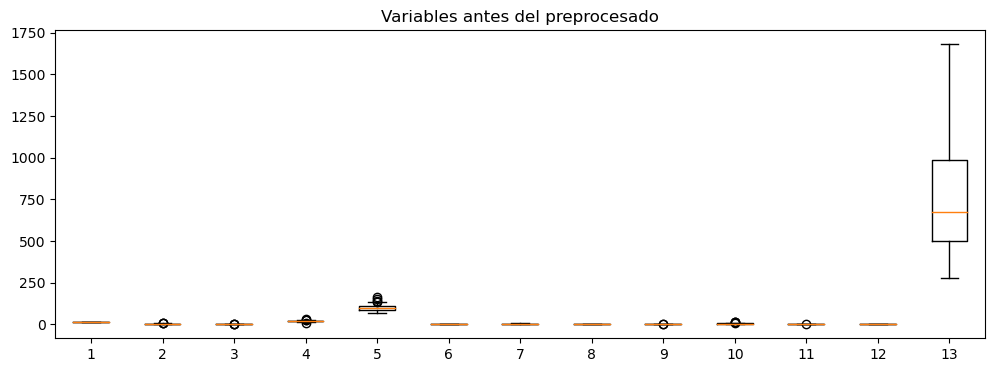

In [58]:
datos_graf = datos_grafFS = [df_wine['Alcohol'],df_wine['Ácido Málico'],df_wine['Ceniza'],df_wine['Alcalinidad Ceniza'],df_wine['Magnesio'],df_wine['Total Fenoles'],df_wine['Flavonoides'],df_wine['Fenoles no Flavonoides'],df_wine['Proantocianinas'],df_wine['Intensidad de Color'],df_wine['Tono'],df_wine['Dilución'],df_wine['Prolina']]
fig = plt.figure(1, figsize=(12, 4))
ax = fig.add_subplot(111)
bp = ax.boxplot(datos_graf)
ax.set_title("Variables antes del preprocesado", fontsize = 12);

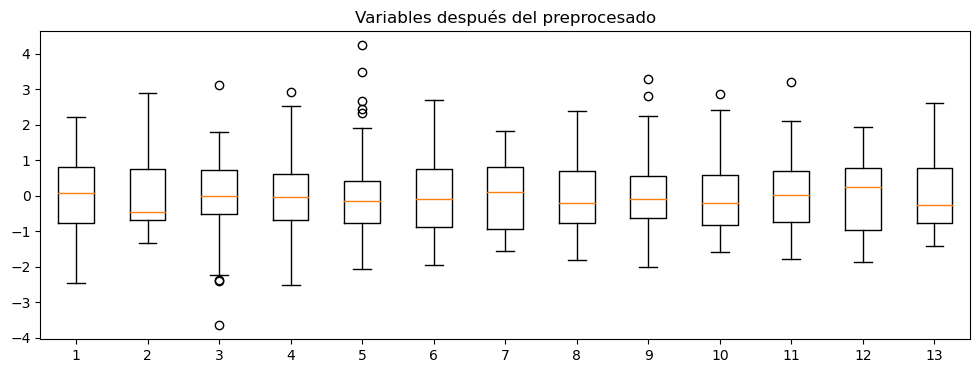

In [59]:
datos_grafFS = [X_train['Alcohol'],X_train['Ácido Málico'],X_train['Ceniza'],X_train['Alcalinidad Ceniza'],X_train['Magnesio'],X_train['Total Fenoles'],X_train['Flavonoides'],X_train['Fenoles no Flavonoides'],X_train['Proantocianinas'],X_train['Intensidad de Color'],X_train['Tono'],X_train['Dilución'],X_train['Prolina']]
fig = plt.figure(1, figsize=(12, 4))
ax = fig.add_subplot(111)
bp = ax.boxplot(datos_grafFS)
ax.set_title("Variables después del preprocesado", fontsize = 12);

In [60]:
modelos = [model_DT_BP,model_KNN_BP,model_SVM_BP]
f1_StdSC = []

for modelo in modelos:
    modelo.fit(X_train, y_train)
    modelo.score(X_test, y_test)
    y_pred_modelo= modelo.predict(X_test)
    f1=metrics.f1_score(y_test, y_pred_modelo, average='weighted')
    f1_StdSC.append(f1)

In [61]:
f1_StdSC

[0.9631474953214083, 0.9436807855732878, 1.0]

In [62]:
df_accuracy['F1_BP_StdSC'] = f1_StdSC
df_accuracy

,Accuracy,Precision,Recall,F1,Accuracy_BP,F1_BP,F1_BP_CV,F1_BP_StdSC
Modelo Dec Tree,0.944444,0.947378,0.944444,0.944376,0.944444,0.944376,0.915637,0.963147
Modelo KNN,0.722222,0.716667,0.722222,0.719069,0.722222,0.719069,0.799808,0.943681
Modelo SVM,0.777778,0.767061,0.777778,0.762031,0.777778,0.762031,0.962115,1.000000


#### El modelo Decision Tree no mejora de manera destacada con el preprocesado al ser un modelo no paramétrico, como explicamos con la validación cruzada.
#### El modelo KNN mejora notablemente, también es un modelo no paramétrico y no necesita preprocesado, pero sí tener las variables en la misma escala para que las mediciones sean efectivas.
#### El modelo SVM sí necesita preprocesado. Si bien sin el preprocesado había conseguido una alta preción ha mejorado hasta la máxima efectividad con este.